# Q1: The Geography of Social Capital in the United States

To replicate Figure 2a of the first paper, we will need to use a dataset containing the state-county FIPS,
the name and the state of each county and the economic connectedness of the county.

We can find this data provided by the authors of the article on https://data.humdata.org/dataset/social-capital-atlas.
We will download and read the Social Capital Atlas - US Counties.csv

In [1]:
import numpy as np
import pandas as pd
sc_county_df = pd.read_csv('data/social_capital_county.csv',dtype={"county": str})
sc_county_df

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.39210,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.39600,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.97360,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.49340,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.91160,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",2402.96900,44117.0,0.96235,0.01280,1.14781,0.02794,1.13449,1.32399,...,1.12164,1.12907,0.09519,-0.12030,-0.02333,-0.08683,0.10809,0.99710,0.07321,0.01225
3085,56039,"Teton, Wyoming",783.24982,23059.0,1.07623,0.01744,1.23113,0.04692,1.13296,1.63551,...,1.32874,1.35341,0.14337,-0.11958,0.07346,-0.07364,0.09253,0.98648,0.09747,0.03223
3086,56041,"Uinta, Wyoming",2174.06180,20609.0,0.95452,0.01404,1.04595,0.03455,0.92831,1.32040,...,1.05446,1.06284,0.13816,-0.12194,0.00808,-0.06074,0.11204,0.99479,0.06942,0.01222
3087,56043,"Washakie, Wyoming",872.51544,8129.0,0.90667,0.01928,0.90794,0.04962,0.78223,1.29208,...,0.88480,0.88589,0.06667,-0.20435,-0.02615,-0.06076,0.11592,0.99708,0.05843,0.03512


Here we can find the data we need, as well as many other measures of economic connectedness for each county.

The column we are interested in is 'ec_county', describing the economic connectedness of each county.

We will use pandas to filter the columns accordingly.

In [2]:
ec_per_county = sc_county_df.loc[:,['county','county_name','ec_county']]
ec_per_county

,county,county_name,ec_county
0,1001,"Autauga, Alabama",0.72077
1,1003,"Baldwin, Alabama",0.74313
2,1005,"Barbour, Alabama",0.41366
3,1007,"Bibb, Alabama",0.63152
4,1009,"Blount, Alabama",0.72562
...,...,...,...
3084,56037,"Sweetwater, Wyoming",0.96235
3085,56039,"Teton, Wyoming",1.07623
3086,56041,"Uinta, Wyoming",0.95452
3087,56043,"Washakie, Wyoming",0.90667


## Binning

Now we have the data that we need to create the figure.

We need to start by assigning each county to a bin, according to its economic connectedness.

For the purpose of this figure, we will create 10 bins by equaly destributing the counties to quantiles.

Do do that we will use pandas.qcut method.

In [3]:
ec_per_county['bin'] = pd.qcut(ec_per_county['ec_county'], q=10, precision = 2).astype(str)
ec_per_county

,county,county_name,ec_county,bin
0,1001,"Autauga, Alabama",0.72077,"(0.72, 0.76]"
1,1003,"Baldwin, Alabama",0.74313,"(0.72, 0.76]"
2,1005,"Barbour, Alabama",0.41366,"(0.27999999999999997, 0.58]"
3,1007,"Bibb, Alabama",0.63152,"(0.58, 0.67]"
4,1009,"Blount, Alabama",0.72562,"(0.72, 0.76]"
...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",0.96235,"(0.9, 0.97]"
3085,56039,"Teton, Wyoming",1.07623,"(1.06, 1.36]"
3086,56041,"Uinta, Wyoming",0.95452,"(0.9, 0.97]"
3087,56043,"Washakie, Wyoming",0.90667,"(0.9, 0.97]"


In [4]:
ec_per_county['bin'].value_counts()

(0.27999999999999997, 0.58]    302
(0.58, 0.67]                   302
(0.67, 0.72]                   302
(0.76, 0.81]                   302
(0.81, 0.85]                   302
(0.9, 0.97]                    302
(0.97, 1.06]                   302
(1.06, 1.36]                   302
(0.72, 0.76]                   301
(0.85, 0.9]                    301
nan                             71
Name: bin, dtype: int64

As we can see we created 10 bins containing equaly the counties, and one bin called 'nan' for the counties that didn't have enough data to calculate the economic connectedness.

Next, we will change the name of each bin to make it more presentable for our final figures legend.
We are also rounding the ec values and changing NaN to 'NA' for better presentation.

In [5]:
dict = {'(0.27999999999999997, 0.58]':'< 0.58',
        '(0.58, 0.67]':'0.58-0.67',
       '(0.67, 0.72]':'0.67-0.72',
       '(0.76, 0.81]':'0.76-0.81',
       '(0.81, 0.85]':'0.81-0.85',
       '(0.9, 0.97]':'0.9-0.97',
       '(0.97, 1.06]':'0.97-1.06',
       '(1.06, 1.36]':'> 1.06',
       '(0.72, 0.76]':'0.72-0.76',
        '(0.85, 0.9]':'0.85-0.9',
        'nan':'NA'}
ec_per_county['bin'].replace(dict,inplace=True)
ec_per_county['ec_county']=ec_per_county['ec_county'].round(2)
ec_per_county['ec_county'].fillna('NA',inplace=True)

ec_per_county

,county,county_name,ec_county,bin
0,1001,"Autauga, Alabama",0.72,0.72-0.76
1,1003,"Baldwin, Alabama",0.74,0.72-0.76
2,1005,"Barbour, Alabama",0.41,< 0.58
3,1007,"Bibb, Alabama",0.63,0.58-0.67
4,1009,"Blount, Alabama",0.73,0.72-0.76
...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",0.96,0.9-0.97
3085,56039,"Teton, Wyoming",1.08,> 1.06
3086,56041,"Uinta, Wyoming",0.95,0.9-0.97
3087,56043,"Washakie, Wyoming",0.91,0.9-0.97


Now we are ready to plot.

## Plotly.express

For our figure we will use the plotly.express library.

Our figure will be a choropleth depicting the economic connectedness of each county with color on a US map.

To do that we will match our county FIPS (on column 'county') with the GeoJSON data given to us by plotly on https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json.

To move forward we have to make a change on our DataSets FIPS.

The FIPS on the GeoJson data have a leading 0 for each 4-digit FIP something that isn't true in our data.

For example, on our dataset Autauga,Alabama has a FIP of 1001 when on the GeoJson it's 01001. 

Down below we correct this issue.

In [6]:
def f(x):
    if len(x) == 4:
        x = '0' + x
    return x
ec_per_county['county'] = ec_per_county['county'].map(f)
ec_per_county

,county,county_name,ec_county,bin
0,01001,"Autauga, Alabama",0.72,0.72-0.76
1,01003,"Baldwin, Alabama",0.74,0.72-0.76
2,01005,"Barbour, Alabama",0.41,< 0.58
3,01007,"Bibb, Alabama",0.63,0.58-0.67
4,01009,"Blount, Alabama",0.73,0.72-0.76
...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",0.96,0.9-0.97
3085,56039,"Teton, Wyoming",1.08,> 1.06
3086,56041,"Uinta, Wyoming",0.95,0.9-0.97
3087,56043,"Washakie, Wyoming",0.91,0.9-0.97


## Figure 2a

Now we can start to plot. We will firstly read the GeoJson Data:

In [7]:
import plotly.express as px
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

Then we will create the choropleth figure matching our data with the GeoJson and coloring each county depending on its economic connectedness bin, following the RdBu colormap (NA is colored with gold)

In [8]:
fig = px.choropleth(ec_per_county, geojson=counties, locations='county', color='bin',hover_name='county_name',hover_data={'county':True,'ec_county':True,'bin':False},
                    # Giving the presentation order of the bins.
                    category_orders={'bin':['> 1.06','0.97-1.06','0.9-0.97','0.85-0.9','0.81-0.85','0.76-0.81','0.72-0.76','0.67-0.72','0.58-0.67','< 0.58','NA']},
                    # Giving the color HEX for each of the 10 bins following RdBu.
                    color_discrete_map ={
                               '> 1.06':"#053061",
                               '0.97-1.06':"#2166ac",
                               '0.9-0.97':"#4393c3",
                               '0.85-0.9':"#92c5de",
                               '0.81-0.85':"#d1e5f0",
                               '0.76-0.81':"#f7f7f7",
                               '0.72-0.76':"#fddbc7",
                               '0.67-0.72':"#f4a582",
                               '0.58-0.67':"#d6604d",
                               '< 0.58':"#b2182b",
                               'NA':"#FFD700"},
                        scope="usa",
                    # Changing the labels for the interactive hover.
                           labels={'ec_county':'economic connectedness',
                                  'bin':'Economic Connectedness'}
                          )
#fig.show()

# Q2: Economic Connectedness and Outcomes

To create Figure 4 from the first paper we will use the economic connectedness values from Q1 and also the income mobility obtained by the Opportunity Atlas.

Firstly we will create a dataframe of the county FIPS, name, the economic connectedness and the population of the county 

In [9]:
ec_per_county = sc_county_df.loc[:,['county','county_name','ec_county','pop2018']]
ec_per_county.rename(columns={'county':'fips'},inplace = True)
ec_per_county

,fips,county_name,ec_county,pop2018
0,1001,"Autauga, Alabama",0.72077,55200.0
1,1003,"Baldwin, Alabama",0.74313,208107.0
2,1005,"Barbour, Alabama",0.41366,25782.0
3,1007,"Bibb, Alabama",0.63152,22527.0
4,1009,"Blount, Alabama",0.72562,57645.0
...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",0.96235,44117.0
3085,56039,"Teton, Wyoming",1.07623,23059.0
3086,56041,"Uinta, Wyoming",0.95452,20609.0
3087,56043,"Washakie, Wyoming",0.90667,8129.0


After we will aquire the data for the upward mobility from the Oppurtunity Atlas

In [10]:
county_outcomes_df = pd.read_csv('data/county_outcomes_simple.csv',dtype={"state": str,"county": str})
county_outcomes_df

,state,county,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,kfr_black_pooled_p25,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
0,1,1,11101.0,Montgomery,0.361666,0.005026,0.030568,0.004108,5922.3921,0.307032,...,0.057968,0.057395,0.025038,0.006608,1874.46810,989.14886,50.308254,1739.24780,989.096620,54.077316
1,1,3,11001.0,Mobile,0.388847,0.003599,0.022593,0.002463,15458.3960,0.301880,...,0.054038,0.034066,0.029861,0.004701,5544.37500,1964.96840,218.435900,5226.07810,1916.269400,210.060300
2,1,5,10301.0,Eufaula,0.349386,0.005937,0.033516,0.005712,4863.9736,0.308615,...,NaN,NaN,0.009500,0.006570,729.84253,1787.36910,NaN,629.64722,1806.091700,NaN
3,1,7,10801.0,Tuscaloosa,0.363391,0.008233,0.031667,0.007499,3061.4934,0.309438,...,NaN,NaN,0.038612,0.013741,983.28558,613.93317,NaN,941.44788,565.889710,NaN
4,1,9,10700.0,Birmingham,0.391879,0.005882,0.020528,0.003750,6740.9116,0.310179,...,0.037591,0.027402,0.034564,0.007016,2946.53000,71.30426,442.633730,2779.32890,64.377319,411.615330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,72,145,NaN,NaN,0.252577,0.028445,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,72,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,72,149,NaN,NaN,0.212865,0.028881,0.006759,0.039919,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,72,151,NaN,NaN,0.256017,0.021645,0.017516,0.027270,NaN,NaN,...,0.025344,0.036674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will merge the two dataframes by the fips of the counties

Firstly, we have to create a fips column for the second dataframe.

We will add leading 0s where needed on the county fips and then and the state and county fips to get the new column

In [11]:
def f(x):
    if (len(x) < 3) and (len(x)> 0):
        for i in range(0,3-len(x)):
            x = '0' + x
    return x
county_outcomes_df["county"] = county_outcomes_df["county"].map(f)
county_outcomes_df['fips'] = county_outcomes_df['state'] +county_outcomes_df['county']
county_outcomes_df['fips']

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3214    72145
3215    72147
3216    72149
3217    72151
3218    72153
Name: fips, Length: 3219, dtype: object

We only need the kfr_pooled_pooled_p25 column of the dataframe(as well as the fips) that describes the upward mobility of children with parents at the 25th percentile of the income distribution.

In [12]:
county_outcomes_df = county_outcomes_df.loc[:,['kfr_pooled_pooled_p25','fips']]
county_outcomes_df

,kfr_pooled_pooled_p25,fips
0,0.361666,1001
1,0.388847,1003
2,0.349386,1005
3,0.363391,1007
4,0.391879,1009
...,...,...
3214,0.252577,72145
3215,NaN,72147
3216,0.212865,72149
3217,0.256017,72151


Now we can merge the two dataframes by the fips of the counties on a new dataframe: ec_and_kfr_df

In [13]:
ec_and_kfr_df = pd.merge(ec_per_county,county_outcomes_df,on='fips',how = 'inner')
ec_and_kfr_df

,fips,county_name,ec_county,pop2018,kfr_pooled_pooled_p25
0,1001,"Autauga, Alabama",0.72077,55200.0,0.361666
1,1003,"Baldwin, Alabama",0.74313,208107.0,0.388847
2,1005,"Barbour, Alabama",0.41366,25782.0,0.349386
3,1007,"Bibb, Alabama",0.63152,22527.0,0.363391
4,1009,"Blount, Alabama",0.72562,57645.0,0.391879
...,...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",0.96235,44117.0,0.486252
3085,56039,"Teton, Wyoming",1.07623,23059.0,0.533668
3086,56041,"Uinta, Wyoming",0.95452,20609.0,0.487148
3087,56043,"Washakie, Wyoming",0.90667,8129.0,0.453807


Now for the plot we will only need the 200 most populous counties

In [14]:
ec_and_kfr_df.sort_values('pop2018',ascending=False,inplace = True)
ec_and_kfr_df=ec_and_kfr_df.head(200)
ec_and_kfr_df

,fips,county_name,ec_county,pop2018,kfr_pooled_pooled_p25
203,6037,"Los Angeles, California",0.73580,10098052.0,0.431230
605,17031,"Cook, Illinois",0.75869,5223719.0,0.384614
2598,48201,"Harris, Texas",0.67668,4602523.0,0.418473
102,4013,"Maricopa, Arizona",0.74400,4253913.0,0.398581
221,6073,"San Diego, California",0.90846,3302833.0,0.425785
...,...,...,...,...,...
2517,48039,"Brazoria, Texas",0.83867,353999.0,0.451939
357,12083,"Marion, Florida",0.62977,348371.0,0.374836
1310,27003,"Anoka, Minnesota",1.03045,347431.0,0.457203
2512,48027,"Bell, Texas",0.77036,342236.0,0.381505


## Plotting with Seaborn and pyplot

On the final plot we will have text arrows pointing on 5 big cities. On our data frame we don't have the cities rather the counties.

To solve that we will create a dictionary connecting these cities with their counties so we can point to them and use them and use the city names as labels.

In [15]:
dic = {'New York, New York':'New York City','Salt Lake, Utah':'Salt Lake City','Hennepin, Minnesota':'Minneapolis','San Francisco, California':'San Francisco','Marion, Indiana':'Indianapolis'}

Now we have all the data we need to create the plot.

We will use seaborn and pyplot for the figure as well as pyplot.annotate for the arrow text

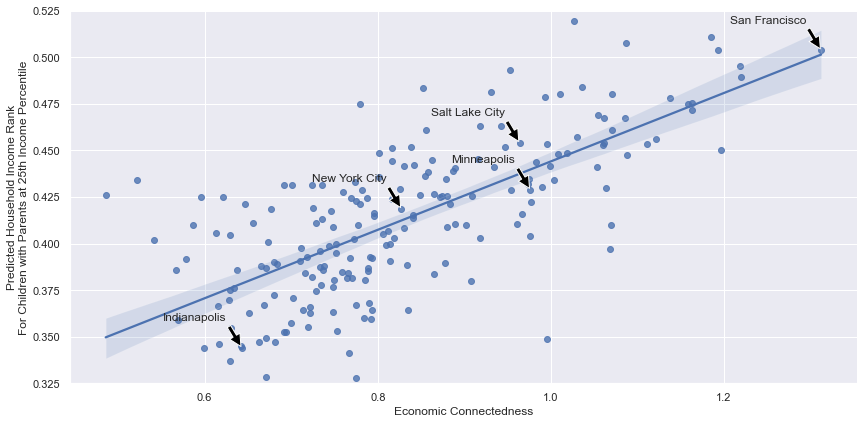

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(6,9)})
sns.lmplot(data=ec_and_kfr_df, x="ec_county", y="kfr_pooled_pooled_p25",height = 6, aspect = 2)
plt.ylabel("Predicted Household Income Rank\nFor Children with Parents at 25th Income Percentile")
plt.xlabel("Economic Connectedness")
plt.ylim(0.325,.525)
for key in dic:
    plt.annotate(dic[key],
                xy=(ec_and_kfr_df[ec_and_kfr_df['county_name']==key]['ec_county'] ,ec_and_kfr_df[ec_and_kfr_df['county_name']==key]['kfr_pooled_pooled_p25'] ), xycoords='data',
                xytext=(-15, 25), textcoords='offset points',
                arrowprops={'facecolor':'black', 'shrink':0.05},
                horizontalalignment='right', verticalalignment='bottom')

# Q3: Upward Income Mobility, Economic Connectedness, and Median House Income

To replicate figure 6 of the first paper we are going to need:

The economic connectedness

The Median household income

The upward mobility

For every ZIP code

## Economic connectedness per Zip Code

For this part of the data we are going to pull data from the social capital Atlas found here https://data.humdata.org/dataset/social-capital-atlas and specificly the Social Capital Atlas - US Zip Codes.csv

Lets read it with pandas

In [17]:
social_capital_zip_df = pd.read_csv('data/social_capital_zip.csv',dtype={"zip": str})
social_capital_zip_df

,zip,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.105720,0.945260,0.05650,0.010800
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.103400,0.901630,0.14951,0.036880
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.136500,0.769240,0.10501,0.080500
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.105540,0.958370,0.15862,0.021630
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.103910,0.948730,0.13053,0.016900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23023,99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,...,1.09039,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.134730,0.997200,0.11883,0.029990
23024,99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,...,1.04318,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.155610,0.997520,0.08404,0.032150
23025,99925,2198.0,154.513840,927,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.146579,0.992298,0.12396,0.027728
23026,99926,2198.0,311.014252,1635,0.87888,0.03618,0.81081,0.83409,1.07167,0.04187,...,0.92952,0.80694,0.00877,-0.07257,-0.00480,-0.09655,0.252740,1.000000,0.14291,0.011250


From this dataframe we are only gonna need the ZIP codes and the ec per zip, found on column ec_zip

In [18]:
ec_per_zip_df = social_capital_zip_df.loc[:,['zip','ec_zip']]
ec_per_zip_df

,zip,ec_zip
0,1001,0.88157
1,1002,1.18348
2,1003,1.37536
3,1005,1.15543
4,1007,1.19240
...,...,...
23023,99901,0.99517
23024,99921,0.87977
23025,99925,NaN
23026,99926,0.87888


## Upward Mobility and Median Household income

Next we are gonna look up for information on the household income rank for children with parents below 25% of the income distribution and the median household income.

Of course we need this information for every zip.

We are going to look up on the replication package of the paper(https://opportunityinsights.org/data/), specificly on the Replication Code and Data zip. We download this file and extract the zip_covariates.dta data file.

We read it with pandas.

In [19]:
zip_cov_df = pd.read_stata('data/zip_covariates.dta')
zip_cov_df['zip'] = zip_cov_df['zip'].astype(str)
zip_cov_df

,zip,num_below_p50,kfr_pooled_pooled_p25,kfr_26_pooled_pooled_p25,kid_black_pooled_blw_p50_n,kfr_black_pooled_p25,kid_white_pooled_blw_p50_n,kfr_white_pooled_p25,pop_2000_n,jobs_total_5mi_2015,...,pop2018,med_inc_2018,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018,cz,czname
0,36006,210.877877,0.375984,0.460341,81.351499,0.348443,120.394809,0.412860,1207.138634,309.533479,...,913,47148.0,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953,11101.0,Montgomery
1,36067,3396.898229,0.351230,0.413896,1187.164279,0.295008,2022.323759,0.402333,23045.006217,6666.228625,...,28727,53578.0,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155,11101.0,Montgomery
2,36749,193.980705,0.356113,0.418601,114.752491,0.332565,73.111485,0.409344,1069.127396,1177.834674,...,779,37054.0,0.707317,0.292683,0.000000,0.000000,0.000000,0.000000,11101.0,Montgomery
3,36066,1261.963181,0.404268,0.445521,250.701201,0.327684,933.891151,0.438869,13441.530151,11873.922321,...,19097,62089.0,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165,11101.0,Montgomery
4,36051,278.664883,0.360447,0.423355,61.973826,0.331816,199.838793,0.388097,1866.933563,592.243591,...,2106,69423.0,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670,11101.0,Montgomery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32812,82442,84.668144,0.492363,0.504219,NaN,NaN,64.030983,0.520918,673.726135,NaN,...,710,55733.0,0.969014,0.000000,0.000000,0.000000,0.000000,0.004225,34302.0,Worland
32813,82401,827.899271,0.460857,0.500579,NaN,NaN,597.772352,0.484634,7679.737826,NaN,...,7585,52988.0,0.810020,0.000132,0.003823,0.000000,0.000000,0.151615,34302.0,Worland
32814,82730,127.302503,0.499194,0.511907,NaN,NaN,118.333812,0.507033,1406.432987,NaN,...,1531,41667.0,0.852384,0.022208,0.000000,0.019595,0.000000,0.035924,34601.0,Gillette
32815,82701,492.476140,0.482879,0.526536,NaN,NaN,443.024637,0.490022,5065.365210,515.000000,...,5486,55192.0,0.921619,0.000365,0.006744,0.051039,0.000000,0.013489,34601.0,Gillette


From this table we are only going to need the upward mobility(kfr_pooled_pooled_p25) and the median household income for 2018(med_inc_2018), together with the ZIP codes

In [20]:
zip_cov_df = zip_cov_df.loc[:,['zip','kfr_pooled_pooled_p25','med_inc_2018']]
zip_cov_df

,zip,kfr_pooled_pooled_p25,med_inc_2018
0,36006,0.375984,47148.0
1,36067,0.351230,53578.0
2,36749,0.356113,37054.0
3,36066,0.404268,62089.0
4,36051,0.360447,69423.0
...,...,...,...
32812,82442,0.492363,55733.0
32813,82401,0.460857,52988.0
32814,82730,0.499194,41667.0
32815,82701,0.482879,55192.0


Now we have to join the two tables on their ZIP code column to have all the data we need in one table.

In [21]:
ec_mhhi_kfr_df = ec_per_zip_df.merge(zip_cov_df,on='zip',how='inner')
ec_mhhi_kfr_df.dropna(inplace=True)
ec_mhhi_kfr_df

,zip,ec_zip,kfr_pooled_pooled_p25,med_inc_2018
0,1001,0.88157,0.468741,62144.0
1,1002,1.18348,0.475851,55858.0
3,1005,1.15543,0.407809,68278.0
4,1007,1.19240,0.476621,93300.0
6,1010,0.73856,0.492584,84471.0
...,...,...,...,...
23013,99840,1.11489,0.485863,72237.0
23014,99901,0.99517,0.404646,70356.0
23015,99921,0.87977,0.294530,58571.0
23017,99926,0.87888,0.277356,53409.0


We have to divide the data of the dataframe on 5 bins(quintiles) based on their upward mobility(kfr_pooled_pooled_p25).

For that we are using pd.qcut() method.

In [22]:
ec_mhhi_kfr_df['bin'] = pd.qcut(ec_mhhi_kfr_df['kfr_pooled_pooled_p25'], q=5, precision = 2).astype(str)
ec_mhhi_kfr_df

,zip,ec_zip,kfr_pooled_pooled_p25,med_inc_2018,bin
0,1001,0.88157,0.468741,62144.0,"(0.44, 0.48]"
1,1002,1.18348,0.475851,55858.0,"(0.44, 0.48]"
3,1005,1.15543,0.407809,68278.0,"(0.38, 0.41]"
4,1007,1.19240,0.476621,93300.0,"(0.44, 0.48]"
6,1010,0.73856,0.492584,84471.0,"(0.48, 0.72]"
...,...,...,...,...,...
23013,99840,1.11489,0.485863,72237.0,"(0.48, 0.72]"
23014,99901,0.99517,0.404646,70356.0,"(0.38, 0.41]"
23015,99921,0.87977,0.294530,58571.0,"(0.19999999999999998, 0.38]"
23017,99926,0.87888,0.277356,53409.0,"(0.19999999999999998, 0.38]"


As we can see all the data got equaly distributed to a bin

In [23]:
ec_mhhi_kfr_df['bin'].value_counts()

(0.48, 0.72]                   3783
(0.41, 0.44]                   3783
(0.19999999999999998, 0.38]    3783
(0.44, 0.48]                   3782
(0.38, 0.41]                   3782
Name: bin, dtype: int64

We will rename all the bin values we found for better presentation on our plot.

In [24]:
dict_bin_names = {'(0.48, 0.72]':'>48','(0.41, 0.44]':'41-44','(0.19999999999999998, 0.38]':'<38',
                 '(0.44, 0.48]':'44-48','(0.38, 0.41]':'38-41'}
ec_mhhi_kfr_df['bin'].replace(dict_bin_names,inplace=True)
ec_mhhi_kfr_df

,zip,ec_zip,kfr_pooled_pooled_p25,med_inc_2018,bin
0,1001,0.88157,0.468741,62144.0,44-48
1,1002,1.18348,0.475851,55858.0,44-48
3,1005,1.15543,0.407809,68278.0,38-41
4,1007,1.19240,0.476621,93300.0,44-48
6,1010,0.73856,0.492584,84471.0,>48
...,...,...,...,...,...
23013,99840,1.11489,0.485863,72237.0,>48
23014,99901,0.99517,0.404646,70356.0,38-41
23015,99921,0.87977,0.294530,58571.0,<38
23017,99926,0.87888,0.277356,53409.0,<38


## Seaborn.scatterplot

We will use seaborn and matplotlib.pyplot to create our figure.
The y-axis will describe the economic connectedness of each ZIP

The x-axis will describe the median household income of each ZIP code

The color of each dot will describe the Upwoard Mobility bin of each ZIP code(Red to Blue)

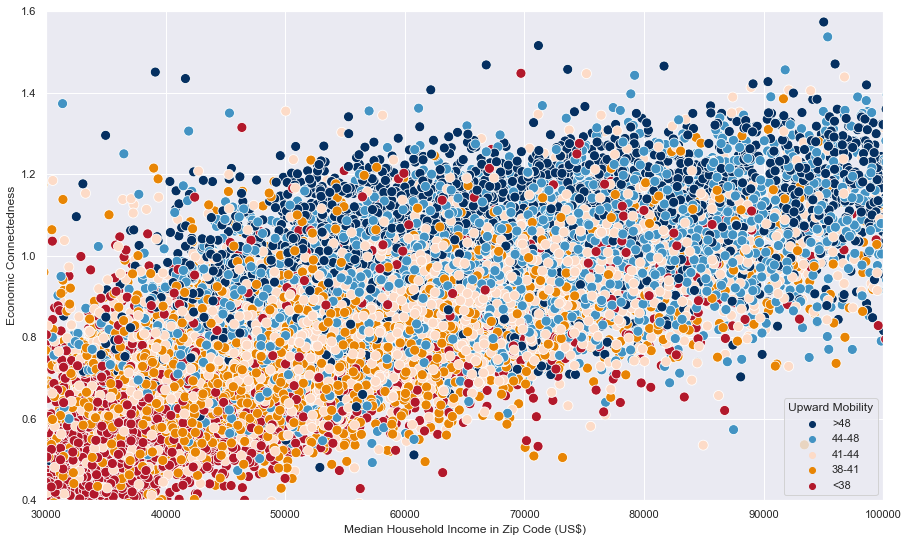

In [25]:
sns.set(rc={'figure.figsize':(15,9)})
sns.scatterplot(s=100,data=ec_mhhi_kfr_df, x="med_inc_2018", y="ec_zip",hue = 'bin',hue_order=['>48','44-48','41-44','38-41','<38'],palette =['#053061','#4393c3','#fddbc7','#e88504','#b2182b'])
plt.xlim(30000,100000)
plt.ylim(0.4,1.6)
plt.xlabel("Median Household Income in Zip Code (US$)")
plt.ylabel("Economic Connectedness")
plt.legend(title = 'Upward Mobility',loc='lower right')

# Q4: Friending Bias and Exposure by High School

To replicate Figure 5a of the second paper we need data for:

The friending bias among the low parental SES students

Share of high parental SES students.

We can find the dta on Social Capital Atlas Datasets, specificly the Social Capital Atlas - US High Schools.csv
We will download it and read it with pandas
 

In [26]:
sc_hs_df = pd.read_csv('data/social_capital_high_school.csv',dtype={'high_school':str})
sc_hs_df

,high_school,high_school_name,zip,county,students_9_to_12,ec_own_ses_hs,ec_own_ses_se_hs,ec_parent_ses_hs,ec_parent_ses_se_hs,ec_high_own_ses_hs,...,ec_high_parent_ses_hs,ec_high_parent_ses_se_hs,exposure_own_ses_hs,exposure_parent_ses_hs,bias_own_ses_hs,bias_parent_ses_hs,bias_high_own_ses_hs,bias_high_parent_ses_hs,clustering_hs,volunteering_rate_hs
0,00000044,Holy Spirit Catholic School,35405,1125,158,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693142,0.086807
1,00000226,John Carroll Catholic HS,35209,1073,538,1.52901,0.04220,1.43847,0.05073,1.64439,...,1.46086,0.04742,1.50707,1.44259,-0.01456,0.00285,-0.09112,-0.01266,0.604580,0.069540
2,00000237,Holy Family Cristo Rey Catholic HS,35218,1073,229,0.66359,0.07105,NaN,NaN,0.87627,...,NaN,NaN,0.65517,NaN,-0.01286,NaN,-0.33747,NaN,0.686860,0.051010
3,00000714,Montgomery Catholic Preparatory School,36116,1101,363,1.56551,0.05799,NaN,NaN,1.60898,...,NaN,NaN,1.49000,NaN,-0.05068,NaN,-0.07985,NaN,0.673730,0.042280
4,00000758,St Paul's Episcopal School,36608,1097,409,1.62628,0.04533,1.57592,0.05254,1.72722,...,1.60072,0.04730,1.62275,1.57514,-0.00217,-0.00050,-0.06438,-0.01624,0.623290,0.060610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17520,Y2121679,St Agnes Academy-St Dominic School,38117,47157,350,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.644070,0.077204
17521,Z0516931,Sayre School,40507,21067,258,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.740327,0.092056
17522,Z1326859,Fort Worth Christian School,76180,48439,327,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680769,0.053181
17523,Z1326892,Second Baptist School,77057,48201,338,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.692155,0.050045


We want to keep the highschool name and code information as well as the ec_parent_ses_hs and parent_ses_hs columns

The Share of high parental SES students can be found by dividing the economic connectedness with parental SES by 2



In [27]:
ses_bias_df = sc_hs_df.loc[:,['high_school','high_school_name','ec_parent_ses_hs','bias_parent_ses_hs']]
ses_bias_df

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN
1,00000226,John Carroll Catholic HS,1.43847,0.00285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN
4,00000758,St Paul's Episcopal School,1.57592,-0.00050
...,...,...,...,...
17520,Y2121679,St Agnes Academy-St Dominic School,NaN,NaN
17521,Z0516931,Sayre School,NaN,NaN
17522,Z1326859,Fort Worth Christian School,NaN,NaN
17523,Z1326892,Second Baptist School,NaN,NaN


In [28]:
ses_bias_df.dropna(inplace=True)
ses_bias_df

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
1,00000226,John Carroll Catholic HS,1.43847,0.00285
4,00000758,St Paul's Episcopal School,1.57592,-0.00050
9,00000973,Mars Hill Bible School,1.25137,-0.00565
33,00002788,Alabama Christian Academy,1.50565,-0.02436
37,00030942,Salpointe Catholic HS,1.42024,0.01845
...,...,...,...,...
17501,X1932087,Bob Jones Academy,1.40620,-0.02587
17510,Y0537452,Jesuit HS,1.43628,0.01170
17511,Y0538208,Archbishop Shaw HS,1.18527,-0.01223
17512,Y0539347,Catholic HS,1.55028,0.00796


We are going to divide the ec_parent_ses_hs by 2 and turn both bias and ec columns to percents (%)

In [29]:
ses_bias_df['ec_parent_ses_hs'] = (ses_bias_df['ec_parent_ses_hs']/2)*100
ses_bias_df['bias_parent_ses_hs'] = ses_bias_df['bias_parent_ses_hs']*100
ses_bias_df

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
1,00000226,John Carroll Catholic HS,71.923500,0.285
4,00000758,St Paul's Episcopal School,78.796000,-0.050
9,00000973,Mars Hill Bible School,62.568500,-0.565
33,00002788,Alabama Christian Academy,75.282500,-2.436
37,00030942,Salpointe Catholic HS,71.012000,1.845
...,...,...,...,...
17501,X1932087,Bob Jones Academy,70.310005,-2.587
17510,Y0537452,Jesuit HS,71.814000,1.170
17511,Y0538208,Archbishop Shaw HS,59.263500,-1.223
17512,Y0539347,Catholic HS,77.514000,0.796


## ggplot

Now we are ready to plot

We will create a plot with ggplot containing annotations for school information we want to point out

First we have to create a dataframe containing the information of the Schools we want to annotate.

In [30]:
hs_list = ['00941729', '060474000432', '170993000942', '170993001185', '170993003989', '171449001804', '250327000436', '360009101928', '370297001285', '483702004138', '250843001336', '062271003230', '010237000962', '00846981', '00852124']
key_hs = ses_bias_df.loc[ses_bias_df['high_school'].isin(hs_list)]
key_hs

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
797,00846981,Bishop Gorman HS,78.055000,0.564
805,00852124,Phillips Exeter Academy,79.206995,-1.380
987,00941729,Dalton School,71.367500,-0.778
1273,010237000962,John L Leflore Magnet School,23.006500,-5.177
2662,060474000432,Berkeley HS,51.010000,11.372
3041,062271003230,North Hollywood Sr HS,28.193501,16.764
5266,170993000942,Lane Technical HS,48.674500,-1.742
5285,170993001185,Lincoln Park HS,45.452500,3.471
5294,170993003989,Payton College Preparatory HS,66.246005,0.493
5403,171449001804,Evanston Twp HS,57.774000,11.782


Now we are ready to plot, using adjustText so the labels of the annotations wont overlap each other.

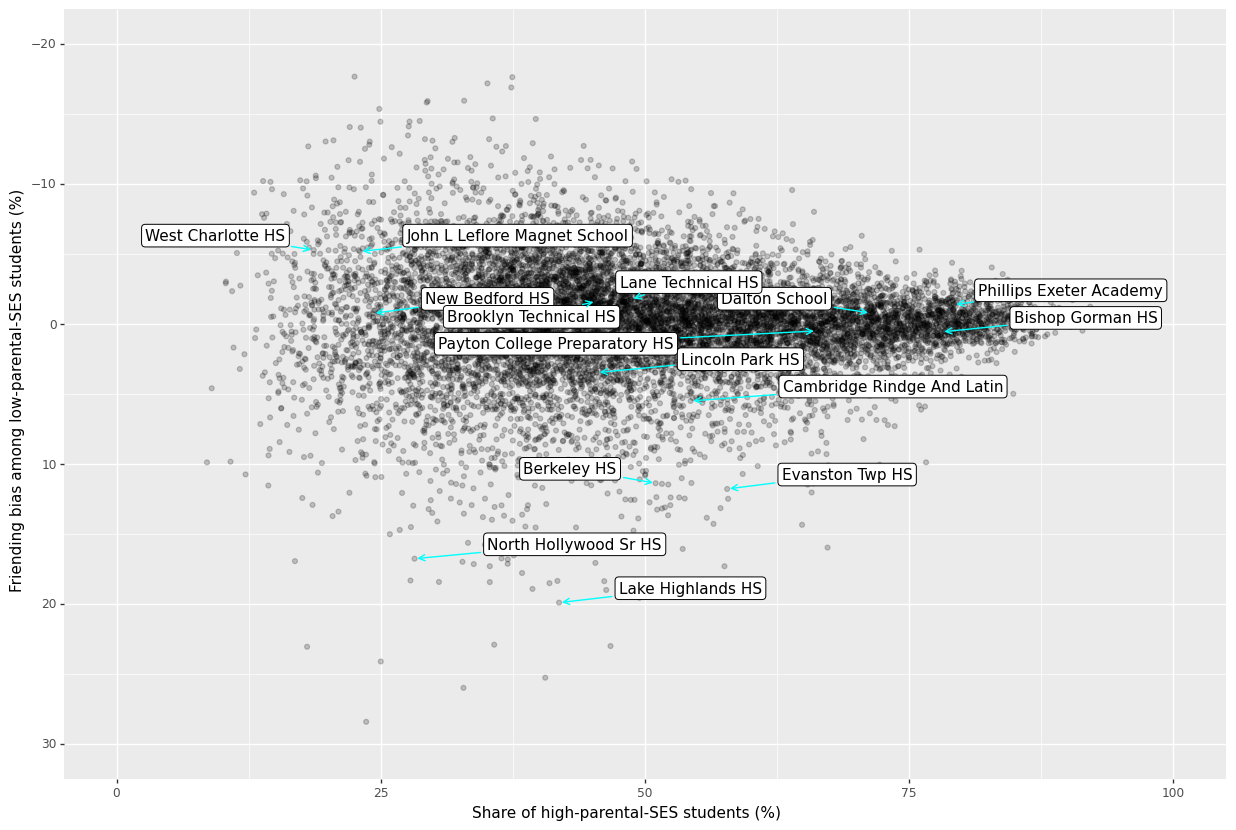

<ggplot: (103934279449)>

In [31]:
from plotnine import *
import adjustText
adjust_text_dict = {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '->',
        'color': 'cyan'
    }
}

ggplot(data=ses_bias_df, mapping=aes(x='ec_parent_ses_hs', y='bias_parent_ses_hs')) +\
    scale_y_reverse(limits=(30, -20)) +\
    xlim(0, 100) +\
    geom_point(alpha=0.2, na_rm=True) +\
    labs(x='Share of high-parental-SES students (%)', y='Friending bias among low-parental-SES students (%)') +\
    geom_label(mapping=aes(label='high_school_name'),adjust_text=adjust_text_dict, data=key_hs, na_rm=True) +\
    theme(figure_size=(15, 10))

# Q5: Friending Bias vs. Racial Diversity

To replicate Extended Data Figure 3 of the second paper we are going to perform a separate analysis for the two correalations of our plot: Neighborhood and College


## Neighborhood data


Firstly we are going to download the covariates data per zip (Neighborhood) from the papers replication package on the data file zip_covariates.dta

Then we are going to read it with pandas.

In [32]:
zip_cov_df = pd.read_stata('data/zip_covariates.dta')
zip_cov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32817 entries, 0 to 32816
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zip                         32817 non-null  int32  
 1   num_below_p50               32768 non-null  float64
 2   kfr_pooled_pooled_p25       32768 non-null  float32
 3   kfr_26_pooled_pooled_p25    32768 non-null  float32
 4   kid_black_pooled_blw_p50_n  12362 non-null  float64
 5   kfr_black_pooled_p25        12362 non-null  float32
 6   kid_white_pooled_blw_p50_n  32449 non-null  float64
 7   kfr_white_pooled_p25        32449 non-null  float32
 8   pop_2000_n                  32817 non-null  float64
 9   jobs_total_5mi_2015         32639 non-null  float64
 10  job_growth_2004_2013        32246 non-null  float32
 11  emp2000                     32817 non-null  float32
 12  hhinc_mean2010              32805 non-null  float32
 13  singleparent_share2000      328

From these columns we will only need the 'zip', the white, black, hispanic, asian and native american shares (to calculate the HHI) and the num_below_p50' (Number of children with below median parental household income)

In [33]:
zip_cov_df = zip_cov_df.loc[:,['zip','num_below_p50','share_white_2018','share_black_2018','share_asian_2018','share_natam_2018','share_hispanic_2018']]
zip_cov_df

,zip,num_below_p50,share_white_2018,share_black_2018,share_asian_2018,share_natam_2018,share_hispanic_2018
0,36006,210.877877,0.838992,0.110624,0.000000,0.002191,0.010953
1,36067,3396.898229,0.713614,0.214885,0.004978,0.004142,0.042155
2,36749,193.980705,0.707317,0.292683,0.000000,0.000000,0.000000
3,36066,1261.963181,0.766194,0.161858,0.029376,0.003142,0.019165
4,36051,278.664883,0.807217,0.177113,0.000000,0.000000,0.015670
...,...,...,...,...,...,...,...
32812,82442,84.668144,0.969014,0.000000,0.000000,0.000000,0.004225
32813,82401,827.899271,0.810020,0.000132,0.000000,0.003823,0.151615
32814,82730,127.302503,0.852384,0.022208,0.019595,0.000000,0.035924
32815,82701,492.476140,0.921619,0.000365,0.051039,0.006744,0.013489


Now we need the y-axis of our plot, the Friending bias among low-SES individuals

We can find that on the Social Capital Atlas datasets specificaly on social_capital_zip.csv (Social Capital Data per Zip)

We will download it and read it with pandas.

In [34]:
sc_zip_df = pd.read_csv('data/social_capital_zip.csv')
sc_zip_df

,zip,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.105720,0.945260,0.05650,0.010800
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.103400,0.901630,0.14951,0.036880
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.136500,0.769240,0.10501,0.080500
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.105540,0.958370,0.15862,0.021630
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.103910,0.948730,0.13053,0.016900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23023,99901,2130.0,1192.299809,13818,0.99517,0.01776,0.88014,0.95456,1.29659,0.01806,...,1.09039,0.94762,0.05710,-0.14293,0.07122,-0.21950,0.134730,0.997200,0.11883,0.029990
23024,99921,2198.0,365.768661,1986,0.87977,0.03071,0.74555,0.82996,1.18270,0.03593,...,1.04318,0.81680,0.06010,-0.08759,0.08723,-0.14339,0.155610,0.997520,0.08404,0.032150
23025,99925,2198.0,154.513840,927,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.146579,0.992298,0.12396,0.027728
23026,99926,2198.0,311.014252,1635,0.87888,0.03618,0.81081,0.83409,1.07167,0.04187,...,0.92952,0.80694,0.00877,-0.07257,-0.00480,-0.09655,0.252740,1.000000,0.14291,0.011250


We will only keep the 'zip' and 'nbhd_bias_zip'(Friending Bias) columns

In [35]:
sc_zip_df = sc_zip_df.loc[:,['zip','nbhd_bias_zip']]
sc_zip_df

,zip,nbhd_bias_zip
0,1001,-0.00336
1,1002,0.18724
2,1003,NaN
3,1005,-0.00064
4,1007,0.04162
...,...,...
23023,99901,0.07122
23024,99921,0.08723
23025,99925,NaN
23026,99926,-0.00480


Now we can merge all the information of the two dataframes we have for the neighborhood data
on the zip code column

In [36]:
zip_cov_df = zip_cov_df.merge(sc_zip_df,on='zip',how='inner')
zip_cov_df

,zip,num_below_p50,share_white_2018,share_black_2018,share_asian_2018,share_natam_2018,share_hispanic_2018,nbhd_bias_zip
0,36006,210.877877,0.838992,0.110624,0.000000,0.002191,0.010953,NaN
1,36067,3396.898229,0.713614,0.214885,0.004978,0.004142,0.042155,0.14995
2,36066,1261.963181,0.766194,0.161858,0.029376,0.003142,0.019165,0.19257
3,36051,278.664883,0.807217,0.177113,0.000000,0.000000,0.015670,NaN
4,36003,380.852783,0.445205,0.521602,0.003161,0.007376,0.017387,NaN
...,...,...,...,...,...,...,...,...
23014,82937,242.941589,0.959543,0.000000,0.000914,0.000000,0.010057,0.06760
23015,82944,15.190780,1.000000,0.000000,0.000000,0.000000,0.000000,0.02009
23016,82401,827.899271,0.810020,0.000132,0.000000,0.003823,0.151615,0.10940
23017,82730,127.302503,0.852384,0.022208,0.019595,0.000000,0.035924,NaN


On a new column named 'hhi' we will calculate the Herfindahl-Hirschman Index (HHI)

The equation for this index is 1−∑𝑖𝑠𝑖2 , where 𝑠𝑖 is the fraction of race/ethnicity 𝑖 (Black, White, Asian, Hispanic, Native American).

We will also remove NaN and 0 values of HHI

In [37]:
zip_cov_df['hhi'] = 1 - (np.power((zip_cov_df['share_white_2018']),2) + np.power((zip_cov_df['share_black_2018']),2) + np.power((zip_cov_df['share_asian_2018']),2) + np.power((zip_cov_df['share_natam_2018']),2) + np.power((zip_cov_df['share_hispanic_2018']),2))
zip_cov_df.dropna(inplace=True)
zip_cov_df = zip_cov_df[zip_cov_df.hhi != 0]
zip_cov_df


,zip,num_below_p50,share_white_2018,share_black_2018,share_asian_2018,share_natam_2018,share_hispanic_2018,nbhd_bias_zip,hhi
1,36067,3396.898229,0.713614,0.214885,0.004978,0.004142,0.042155,0.14995,0.442760
2,36066,1261.963181,0.766194,0.161858,0.029376,0.003142,0.019165,0.19257,0.385509
5,36530,638.030666,0.966278,0.003170,0.000000,0.006629,0.020320,0.01922,0.065841
6,36551,950.686565,0.824233,0.110754,0.000000,0.014509,0.036217,0.03200,0.306851
7,36507,2839.489929,0.718863,0.237781,0.001810,0.007694,0.024122,0.13266,0.426052
...,...,...,...,...,...,...,...,...,...
23010,83001,537.782891,0.781277,0.008691,0.003441,0.004316,0.193001,0.23594,0.352250
23013,82930,1583.028076,0.847282,0.001058,0.001269,0.010576,0.122048,0.15793,0.267103
23014,82937,242.941589,0.959543,0.000000,0.000914,0.000000,0.010057,0.06760,0.079175
23016,82401,827.899271,0.810020,0.000132,0.000000,0.003823,0.151615,0.10940,0.320866


For our plot we seperate the data on 20 ventiles (5% bins) based on their HHI value.

Below we do this bin separation for our data

In [38]:
zip_cov_df['bin'] = pd.qcut(zip_cov_df['hhi'],precision = 2, q=20).astype(str)
zip_cov_df

C:\Users\user\AppData\Local\Temp\ipykernel_10196\2340168915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,zip,num_below_p50,share_white_2018,share_black_2018,share_asian_2018,share_natam_2018,share_hispanic_2018,nbhd_bias_zip,hhi,bin
1,36067,3396.898229,0.713614,0.214885,0.004978,0.004142,0.042155,0.14995,0.442760,"(0.42, 0.46]"
2,36066,1261.963181,0.766194,0.161858,0.029376,0.003142,0.019165,0.19257,0.385509,"(0.38, 0.42]"
5,36530,638.030666,0.966278,0.003170,0.000000,0.006629,0.020320,0.01922,0.065841,"(0.056, 0.082]"
6,36551,950.686565,0.824233,0.110754,0.000000,0.014509,0.036217,0.03200,0.306851,"(0.3, 0.34]"
7,36507,2839.489929,0.718863,0.237781,0.001810,0.007694,0.024122,0.13266,0.426052,"(0.42, 0.46]"
...,...,...,...,...,...,...,...,...,...,...
23010,83001,537.782891,0.781277,0.008691,0.003441,0.004316,0.193001,0.23594,0.352250,"(0.34, 0.38]"
23013,82930,1583.028076,0.847282,0.001058,0.001269,0.010576,0.122048,0.15793,0.267103,"(0.26, 0.3]"
23014,82937,242.941589,0.959543,0.000000,0.000914,0.000000,0.010057,0.06760,0.079175,"(0.056, 0.082]"
23016,82401,827.899271,0.810020,0.000132,0.000000,0.003823,0.151615,0.10940,0.320866,"(0.3, 0.34]"


We can see how the data got equally divided to 20 bins

In [39]:
zip_cov_df['bin'].value_counts()

(0.67, 0.97]        714
(0.3, 0.34]         714
(-0.0095, 0.056]    714
(0.49, 0.52]        713
(0.62, 0.67]        713
(0.1, 0.13]         713
(0.59, 0.62]        713
(0.15, 0.19]        713
(0.46, 0.49]        713
(0.52, 0.55]        713
(0.42, 0.46]        713
(0.38, 0.42]        713
(0.55, 0.59]        713
(0.22, 0.26]        713
(0.19, 0.22]        713
(0.34, 0.38]        713
(0.26, 0.3]         713
(0.082, 0.1]        713
(0.056, 0.082]      713
(0.13, 0.15]        713
Name: bin, dtype: int64

Next we will calculate the hhi and bias indexes for each bin of our data, to present it as one point on our plot

We will do that grouping by the bin values 

The aggregate functions will be a weighted mean for the hhi index, using the num_below_p50 as weights

For the bias index we will get the mean of the bins' bias values

In [40]:
def f(x):
    d = {}
    d['hhi_index'] = np.average(x['hhi'],weights=x['num_below_p50'])
    d['bias_mean'] = np.mean(x['nbhd_bias_zip'])
    return pd.Series(d, index=['hhi_index', 'bias_mean'])
zip_cov_df=zip_cov_df.groupby(['bin']).apply(f)
zip_cov_df

,hhi_index,bias_mean
bin,,
"(-0.0095, 0.056]",0.037536,0.007115
"(0.056, 0.082]",0.070685,0.013419
"(0.082, 0.1]",0.092021,0.026838
"(0.1, 0.13]",0.114021,0.037932
"(0.13, 0.15]",0.137592,0.041356
"(0.15, 0.19]",0.169034,0.054634
"(0.19, 0.22]",0.203310,0.057750
"(0.22, 0.26]",0.240597,0.067052
"(0.26, 0.3]",0.278133,0.076113


Now we have everything we need for the neighborhood data

We will add a type = 'Neighborhood' column which we will later use for the hue attribute of the plot.

We will also multiply the bias values by 100 to get the percentages for the y-axis.

In [41]:
zip_cov_df['type'] = 'Neighborhood'
zip_cov_df['bias_mean']=zip_cov_df['bias_mean']*100
zip_cov_df

,hhi_index,bias_mean,type
bin,,,
"(-0.0095, 0.056]",0.037536,0.711507,Neighborhood
"(0.056, 0.082]",0.070685,1.341948,Neighborhood
"(0.082, 0.1]",0.092021,2.683849,Neighborhood
"(0.1, 0.13]",0.114021,3.793237,Neighborhood
"(0.13, 0.15]",0.137592,4.135569,Neighborhood
"(0.15, 0.19]",0.169034,5.463377,Neighborhood
"(0.19, 0.22]",0.203310,5.774992,Neighborhood
"(0.22, 0.26]",0.240597,6.705199,Neighborhood
"(0.26, 0.3]",0.278133,7.611292,Neighborhood


## College Data

Firstly we are going to download the characteristics data per College from the papers replication package on the data file college_characteristics.dta

Then we are going to read it with pandas.

In [42]:
college_char_df = pd.read_stata('data/college_characteristics.dta')
college_char_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2942
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   college                           2943 non-null   int32   
 1   super_opeid                       2943 non-null   int32   
 2   region                            2943 non-null   category
 3   state                             2943 non-null   object  
 4   fips                              2943 non-null   category
 5   cz                                2943 non-null   float32 
 6   czname                            2943 non-null   object  
 7   county                            2943 non-null   int32   
 8   county_name                       2943 non-null   object  
 9   zip                               2943 non-null   int32   
 10  college_name                      2943 non-null   object  
 11  mean_students_per_cohort          2633 non-null   float6

We will keep the college code, mean_students_per_cohort and race shares columns to calculate the HHI

In [43]:
college_char_df = college_char_df.loc[:,['college','mean_students_per_cohort','asian_or_pacific_share_fall_2000','black_share_fall_2000','hisp_share_fall_2000']]
college_char_df.dropna(inplace=True)
college_char_df

,college,mean_students_per_cohort,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000
0,161000,5860.333333,0.716553,0.011714,0.018803
1,470100,2298.666667,0.056209,0.151004,0.299666
2,120600,5334.666667,0.260676,0.018759,0.136386
3,998900,167.000000,0.036090,0.046617,0.401504
4,3695700,2269.333333,0.142595,0.027094,0.386812
...,...,...,...,...,...
2934,499200,187.000000,0.004403,0.322013,0.008805
2935,1077900,217.000000,0.006803,0.263039,0.095238
2940,1303900,154.000000,0.019224,0.291795,0.069344
2941,473800,780.666667,0.053506,0.121037,0.088872


We only got values for the black, asian and hispanic races.

We will subtract them from 1 to get a column of 'other' races share.

In [44]:
college_char_df['other_share_fall_2000'] = 1 - college_char_df['asian_or_pacific_share_fall_2000'] - college_char_df['black_share_fall_2000'] - college_char_df['hisp_share_fall_2000']
college_char_df

,college,mean_students_per_cohort,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,other_share_fall_2000
0,161000,5860.333333,0.716553,0.011714,0.018803,0.252930
1,470100,2298.666667,0.056209,0.151004,0.299666,0.493120
2,120600,5334.666667,0.260676,0.018759,0.136386,0.584179
3,998900,167.000000,0.036090,0.046617,0.401504,0.515789
4,3695700,2269.333333,0.142595,0.027094,0.386812,0.443499
...,...,...,...,...,...,...
2934,499200,187.000000,0.004403,0.322013,0.008805,0.664780
2935,1077900,217.000000,0.006803,0.263039,0.095238,0.634921
2940,1303900,154.000000,0.019224,0.291795,0.069344,0.619636
2941,473800,780.666667,0.053506,0.121037,0.088872,0.736585


Now we are ready to calculate HHI the same way as before.

In [45]:
college_char_df['hhi'] = 1 - (np.power((college_char_df['other_share_fall_2000']),2) + np.power((college_char_df['asian_or_pacific_share_fall_2000']),2) + np.power((college_char_df['black_share_fall_2000']),2) + np.power((college_char_df['hisp_share_fall_2000']),2))
college_char_df = college_char_df.loc[:,['college','mean_students_per_cohort','hhi']]
college_char_df

,college,mean_students_per_cohort,hhi
0,161000,5860.333333,0.422087
1,470100,2298.666667,0.641071
2,120600,5334.666667,0.571830
3,998900,167.000000,0.569280
4,3695700,2269.333333,0.632618
...,...,...,...
2934,499200,187.000000,0.454279
2935,1077900,217.000000,0.518570
2940,1303900,154.000000,0.525728
2941,473800,780.666667,0.432031


Next to get the friending bias of the colleges we are going to get data from the Social Capital Atlas Dataset, specificaly data/social_capital_college.csv (social capital data per college)

We will download it and read it with pandas

In [46]:
sc_college_df = pd.read_csv('data/social_capital_college.csv')
sc_college_df

,college,college_name,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,...,ec_high_parent_ses_se_college,exposure_own_ses_college,exposure_parent_ses_college,bias_own_ses_college,bias_parent_ses_college,bias_high_own_ses_college,bias_high_parent_ses_college,clustering_college,support_ratio_college,volunteering_rate_college
0,100200,Alabama A & M University,35762,1089,943.666667,0.85678,0.02233,0.67629,0.03241,1.12202,...,0.03498,0.84662,0.65090,-0.01200,-0.03900,-0.32529,-0.14036,0.24470,0.99483,0.03256
1,100300,Faulkner University,36109,1101,227.666667,1.30964,0.04869,1.26671,0.05812,1.54639,...,0.05134,1.23776,1.20183,-0.05807,-0.05398,-0.24935,-0.12001,0.40754,0.99481,0.03336
2,100400,University of Montevallo,35115,1117,494.000000,1.42378,0.03040,1.15413,0.03638,1.57365,...,0.03395,1.41664,1.17101,-0.00504,0.01442,-0.11083,-0.05979,0.30921,0.99683,0.09566
3,100500,Alabama State University,36104,1101,NaN,0.77916,0.01937,0.67090,0.03038,1.04811,...,0.03201,0.75162,0.65297,-0.03664,-0.02747,-0.39448,-0.12802,0.23222,0.99485,0.02150
4,100700,Central Alabama Community College,35010,1123,NaN,0.72742,0.03504,0.77238,0.04497,0.98888,...,0.04984,0.76579,0.76786,0.05010,-0.00589,-0.29133,-0.13139,0.34104,0.99271,0.02922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,4254400,Arkansas State University-Mountain Home,72653,5005,NaN,0.88695,0.04674,0.52927,0.05098,1.00103,...,0.05764,0.89316,0.49553,0.00695,-0.06810,-0.12077,-0.15805,0.32144,0.99446,0.06755
2582,4263400,Florida Polytechnic University,33805,12105,NaN,NaN,NaN,1.20327,0.09919,NaN,...,0.09509,NaN,1.19730,NaN,-0.00499,NaN,-0.03957,0.48909,0.99920,0.04523
2583,4263600,Northeast Lakeview College,78145,48029,NaN,1.28254,0.05277,1.17784,0.06483,1.41132,...,0.06000,1.36033,1.17411,0.05718,-0.00318,-0.03748,-0.06948,0.24113,0.90760,0.03251
2584,4281700,Compton College,90221,6037,NaN,0.71178,0.06780,NaN,NaN,0.81637,...,NaN,0.72474,NaN,0.01789,NaN,-0.12643,NaN,0.21260,0.82709,0.02312


We will only keep the coolege code and bias_parent_ses_college(Friending Bias) columns.

In [47]:
sc_college_df = sc_college_df.loc[:,['college','bias_parent_ses_college']]
sc_college_df.dropna(inplace=True)
sc_college_df

,college,bias_parent_ses_college
0,100200,-0.03900
1,100300,-0.05398
2,100400,0.01442
3,100500,-0.02747
4,100700,-0.00589
...,...,...
2571,4211800,0.03085
2579,4253400,0.14005
2581,4254400,-0.06810
2582,4263400,-0.00499


Now we will merge the two college dataframes to get all the college data together.

In [48]:
college_df = college_char_df.merge(sc_college_df,on='college',how='inner')
college_df

,college,mean_students_per_cohort,hhi,bias_parent_ses_college
0,161000,5860.333333,0.422087,-0.01936
1,120600,5334.666667,0.571830,0.00974
2,3695700,2269.333333,0.632618,0.04626
3,111800,8556.333333,0.617730,0.09131
4,771300,2601.666667,0.646538,0.00661
...,...,...,...,...
1964,209500,11705.333333,0.546872,0.00755
1965,209100,11705.333333,0.546872,0.01312
1966,275800,831.000000,0.549103,0.02565
1967,1043900,2052.666667,0.531485,0.19585


As we did before, we will devide the college data on 20 bins based on their hhi

In [49]:
college_df['bin'] = pd.qcut(college_df['hhi'],precision = 2, q=20).astype(str)
college_df 

,college,mean_students_per_cohort,hhi,bias_parent_ses_college,bin
0,161000,5860.333333,0.422087,-0.01936,"(0.41, 0.45]"
1,120600,5334.666667,0.571830,0.00974,"(0.53, 0.6]"
2,3695700,2269.333333,0.632618,0.04626,"(0.6, 0.74]"
3,111800,8556.333333,0.617730,0.09131,"(0.6, 0.74]"
4,771300,2601.666667,0.646538,0.00661,"(0.6, 0.74]"
...,...,...,...,...,...
1964,209500,11705.333333,0.546872,0.00755,"(0.53, 0.6]"
1965,209100,11705.333333,0.546872,0.01312,"(0.53, 0.6]"
1966,275800,831.000000,0.549103,0.02565,"(0.53, 0.6]"
1967,1043900,2052.666667,0.531485,0.19585,"(0.53, 0.6]"


In [50]:
college_df['bin'].value_counts()

(0.19, 0.21]        100
(-0.0051, 0.048]     99
(0.36, 0.41]         99
(0.29, 0.33]         99
(0.17, 0.19]         99
(0.11, 0.13]         99
(0.075, 0.093]       99
(0.49, 0.53]         99
(0.6, 0.74]          99
(0.13, 0.15]         98
(0.53, 0.6]          98
(0.24, 0.26]         98
(0.33, 0.36]         98
(0.26, 0.29]         98
(0.45, 0.49]         98
(0.15, 0.17]         98
(0.048, 0.075]       98
(0.093, 0.11]        98
(0.41, 0.45]         98
(0.21, 0.24]         97
Name: bin, dtype: int64

Now we will again group by the bin values.

The aggregate functions will be a weighted mean of hhi values using mean_students_per_cohort as weights

and the mean of friending bias of each value of the bins.

In [51]:
def f2(x):
    d = {}
    d['hhi_index'] = np.average(x['hhi'],weights=x['mean_students_per_cohort'])
    d['bias_mean'] = np.mean(x['bias_parent_ses_college'])
    return pd.Series(d, index=['hhi_index', 'bias_mean'])
college_df=college_df.groupby(['bin']).apply(f2)
college_df

,hhi_index,bias_mean
bin,,
"(-0.0051, 0.048]",0.036156,-0.005973
"(0.048, 0.075]",0.062533,-0.002687
"(0.075, 0.093]",0.084897,-0.003406
"(0.093, 0.11]",0.102141,-0.002956
"(0.11, 0.13]",0.125931,0.007290
"(0.13, 0.15]",0.139404,0.001838
"(0.15, 0.17]",0.156831,0.005765
"(0.17, 0.19]",0.178957,0.001386
"(0.19, 0.21]",0.206103,0.003622


We will add a type = 'College' column that will be used on the hue attribute of our plot later.

We will also multiply the bias values by 100 to get percentages.

In [52]:
college_df['type'] = 'College'
college_df['bias_mean']=college_df['bias_mean']*100
college_df

,hhi_index,bias_mean,type
bin,,,
"(-0.0051, 0.048]",0.036156,-0.597283,College
"(0.048, 0.075]",0.062533,-0.268663,College
"(0.075, 0.093]",0.084897,-0.340606,College
"(0.093, 0.11]",0.102141,-0.295592,College
"(0.11, 0.13]",0.125931,0.729040,College
"(0.13, 0.15]",0.139404,0.183765,College
"(0.15, 0.17]",0.156831,0.576520,College
"(0.17, 0.19]",0.178957,0.138626,College
"(0.19, 0.21]",0.206103,0.362150,College


For our plot we will need a union of the data of the neighborhood and college dataframes

For that we will use pd.concat with the two dataframes.

In [53]:
concated = pd.concat([college_df,zip_cov_df])
concated

,hhi_index,bias_mean,type
bin,,,
"(-0.0051, 0.048]",0.036156,-0.597283,College
"(0.048, 0.075]",0.062533,-0.268663,College
"(0.075, 0.093]",0.084897,-0.340606,College
"(0.093, 0.11]",0.102141,-0.295592,College
"(0.11, 0.13]",0.125931,0.729040,College
"(0.13, 0.15]",0.139404,0.183765,College
"(0.15, 0.17]",0.156831,0.576520,College
"(0.17, 0.19]",0.178957,0.138626,College
"(0.19, 0.21]",0.206103,0.362150,College


Now we are ready to plot.

Using seaborn.lmplot and matplotlib.pyplot with hhi_index for the x-axis, bias_mean for the y-axis and type for the hue.

That way we will create two separate scatterplots with correlation lines, separated by the type column (Neighborhood - College) and using the same axes.

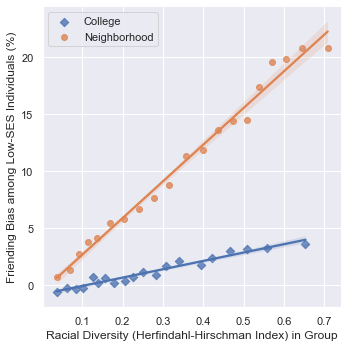

In [54]:
sns.lmplot(data=concated,x='hhi_index',y='bias_mean',hue = 'type',hue_order=['College','Neighborhood'],markers = ['D','o'] , legend = False)
plt.xlabel('Racial Diversity (Herfindahl-Hirschman Index) in Group')
plt.ylabel('Friending Bias among Low-SES Individuals (%)')
plt.legend(loc = 'upper left')